<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

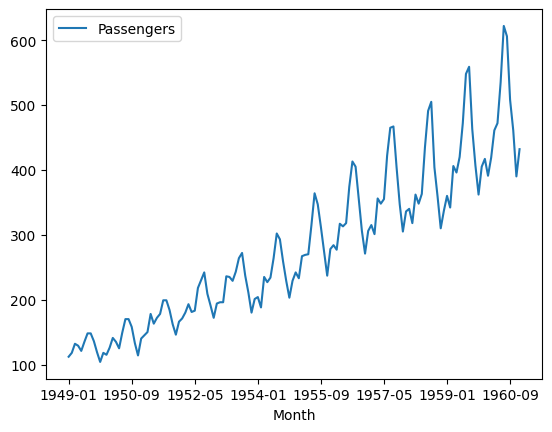

In [66]:
import pandas as pd
from matplotlib import pyplot
ap1=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
ap1=ap1.set_index('Month')
ap1.plot()
pyplot.show()


In [67]:
#Testing for Stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(ap1['Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Ho:Series is not stationary

Ha:Series is stationary

If significance level(alpha) is 5%, what is the decision?

<Axes: xlabel='Month'>

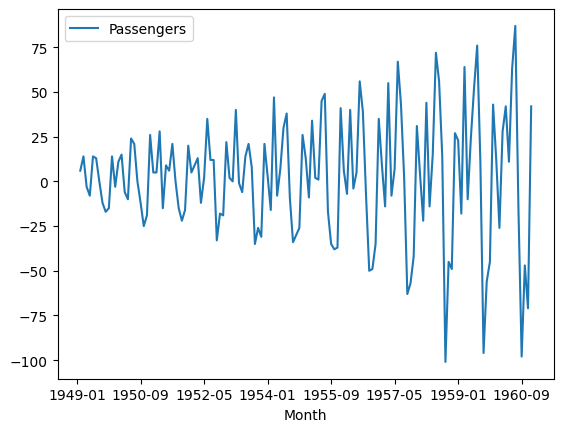

In [68]:
#Take differnce for making stationary
dap = ap1 - ap1.shift(1)
dap.plot()

In [69]:
from statsmodels.tsa.stattools import adfuller
dap=dap.dropna()
result = adfuller(dap['Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.829267
p-value: 0.054213
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


<Axes: xlabel='Month'>

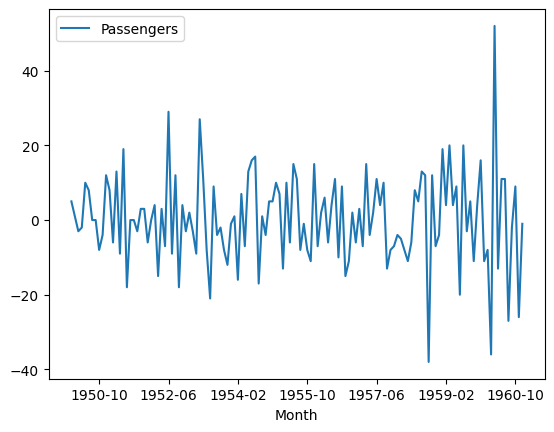

In [71]:
dapS = dap - dap.shift(12)
dapS.plot()

Q:Is there a seasonality in the data?

In [72]:
from statsmodels.tsa.stattools import adfuller
dapS=dapS.dropna()
result = adfuller(dapS['Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.595618
p-value: 0.000000
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


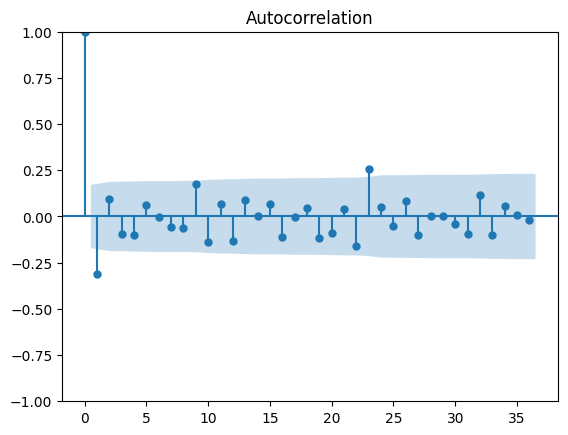

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



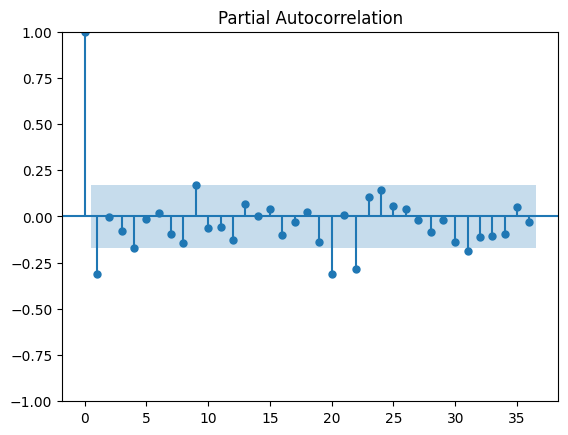

In [74]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

fig = tsaplots.plot_acf(dapS['Passengers'], lags=36)
plt.show()
fig = tsaplots.plot_pacf(dapS['Passengers'], lags=36)
plt.show()


In [ ]:
Ho:Series is not stationary

Ha:Series is stationary

If significance level(alpha) is 5%, what is the decision?

In [75]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(ap1['Passengers'],order=(1,1,1), seasonal_order=(0,1,0,12))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                -508.197
Date:                             Sat, 29 Apr 2023   AIC                           1022.393
Time:                                     19:57:19   BIC                           1031.019
Sample:                                 01-01-1949   HQIC                          1025.898
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3029      0.355     -0.853      0.393      -0.999       0.393
ma.L1         -0.0052      0.336     -0.016      0.988      -0.663       0.652
sigma2       137.0156     14.653      9.350      0.000     108.295     165.736
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.71
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                             0.00
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(ap1['Passengers'],order=(0,1,1), seasonal_order=(0,1,0,12))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -508.319
Date:                             Sat, 29 Apr 2023   AIC                           1020.639
Time:                                     19:57:37   BIC                           1026.389
Sample:                                 01-01-1949   HQIC                          1022.975
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3184      0.063     -5.038      0.000      -0.442      -0.195
sigma2       137.2653     15.024      9.136      0.000     107.818     166.713
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.46
Prob(Q):                              0.95   Prob(JB):                         0.07
Heteroskedasticity (H):               2.37   Skew:                             0.02
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(ap1['Passengers'],order=(1,1,0), seasonal_order=(0,1,0,12))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -508.197
Date:                            Sat, 29 Apr 2023   AIC                           1020.393
Time:                                    19:57:56   BIC                           1026.144
Sample:                                01-01-1949   HQIC                          1022.730
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3076      0.073     -4.186      0.000      -0.452      -0.164
sigma2       137.0108     14.623      9.370      0.000     108.351     165.670
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.75
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                             0.00
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
train=ap1[:-12]
test=ap1[-12:]
train

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1959-08,559
1959-09,463
1959-10,407


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



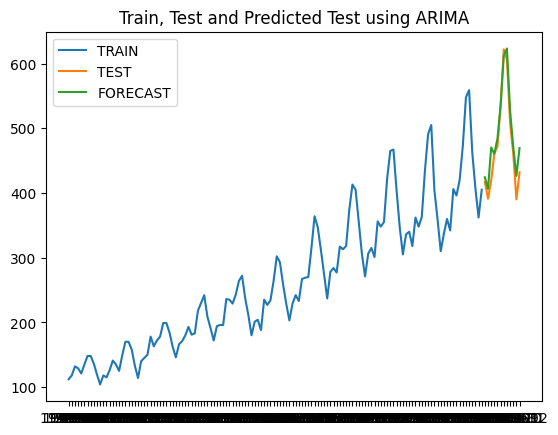

In [80]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train['Passengers'],order=(0,1,1), seasonal_order=(0,1,0,12))
model_fit=model.fit()
test_prediction = model_fit.forecast(12)
test_prediction=pd.DataFrame(test_prediction)
new_index = test.index
test_prediction=test_prediction.set_index(new_index)
test_prediction.columns=['Passengers']
#As we take ln , convert back to original series using exp


plt.plot(train['Passengers'],label='TRAIN')
plt.plot(test['Passengers'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using ARIMA');

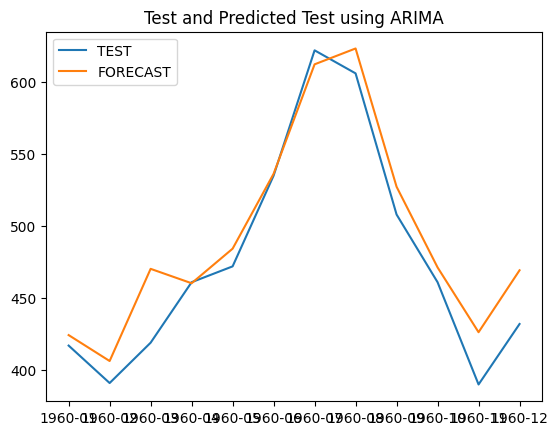

In [81]:
plt.plot(test['Passengers'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Test and Predicted Test using ARIMA');

In [85]:
test_prediction.columns=['Forecast']
test_prediction

,Forecast
Month,
1960-01,424.288203
1960-02,406.288203
1960-03,470.288203
1960-04,460.288203
1960-05,484.288203
1960-06,536.288203
1960-07,612.288203
1960-08,623.288203
1960-09,527.288203


In [86]:
test_prediction['Passengers']=test['Passengers'].values
test_prediction

,Forecast,Passengers
Month,,
1960-01,424.288203,417
1960-02,406.288203,391
1960-03,470.288203,419
1960-04,460.288203,461
1960-05,484.288203,472
1960-06,536.288203,535
1960-07,612.288203,622
1960-08,623.288203,606
1960-09,527.288203,508


In [87]:
import numpy as np
def mae(y_hat, y_true):
    return np.mean(np.abs(y_hat-y_true))

y_true = test_prediction['Passengers'].values
arima_preds = test_prediction['Forecast'].values


print('ARIMA MAE: %0.3f' % mae(arima_preds, y_true))

ARIMA MAE: 18.192


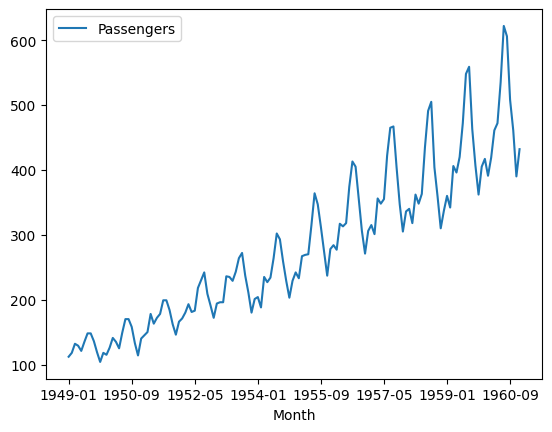

In [40]:
import pandas as pd
from matplotlib import pyplot
ap1=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
ap1=ap1.set_index('Month')
ap1.plot()
pyplot.show()

In [41]:
ap1['unique_id']='M1'
ap1['ds']=ap1.index

In [42]:
train=ap1[:-12]
test=ap1[-12:]
train

,Passengers,unique_id,ds
Month,,,
1949-01,112,M1,1949-01
1949-02,118,M1,1949-02
1949-03,132,M1,1949-03
1949-04,129,M1,1949-04
1949-05,121,M1,1949-05
...,...,...,...
1959-08,559,M1,1959-08
1959-09,463,M1,1959-09
1959-10,407,M1,1959-10


In [ ]:
!pip install  StatsForecast

In [43]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA,AutoETS,HoltWinters

sf = StatsForecast(
    models = [AutoARIMA(season_length = 12),AutoETS(season_length = 12),HoltWinters(season_length = 12)],
    freq = 'M'
)

sf.fit(train)
pred=sf.predict(h=12)

In [44]:
sf.plot(pred)

In [45]:
pred

,ds,AutoARIMA,AutoETS,HoltWinters
unique_id,,,,
M1,1959-12-31,424.160156,406.651276,409.680145
M1,1960-01-31,407.081696,401.732910,390.044067
M1,1960-02-29,470.860535,456.289642,448.929810
M1,1960-03-31,460.913605,440.870514,435.445007
M1,1960-04-30,484.900879,440.333923,454.699951
M1,1960-05-31,536.903931,496.866058,507.904968
M1,1960-06-30,612.903198,545.839111,577.622375
M1,1960-07-31,623.903381,544.672485,581.996765
M1,1960-08-31,527.903320,477.034485,479.946136


In [46]:
test

,Passengers,unique_id,ds
Month,,,
1960-01,417,M1,1960-01
1960-02,391,M1,1960-02
1960-03,419,M1,1960-03
1960-04,461,M1,1960-04
1960-05,472,M1,1960-05
1960-06,535,M1,1960-06
1960-07,622,M1,1960-07
1960-08,606,M1,1960-08
1960-09,508,M1,1960-09


In [59]:
test.reset_index(inplace=True)
test

,index,Month,Passengers,unique_id,ds
0,0,1960-01,417,M1,1960-01
1,1,1960-02,391,M1,1960-02
2,2,1960-03,419,M1,1960-03
3,3,1960-04,461,M1,1960-04
4,4,1960-05,472,M1,1960-05
5,5,1960-06,535,M1,1960-06
6,6,1960-07,622,M1,1960-07
7,7,1960-08,606,M1,1960-08
8,8,1960-09,508,M1,1960-09
9,9,1960-10,461,M1,1960-10


In [60]:
pred.reset_index(inplace=True)
pred

,index,unique_id,ds,AutoARIMA,AutoETS,HoltWinters,Passengers
0,0,M1,1959-12-31,424.160156,406.651276,409.680145,417
1,1,M1,1960-01-31,407.081696,401.732910,390.044067,391
2,2,M1,1960-02-29,470.860535,456.289642,448.929810,419
3,3,M1,1960-03-31,460.913605,440.870514,435.445007,461
4,4,M1,1960-04-30,484.900879,440.333923,454.699951,472
5,5,M1,1960-05-31,536.903931,496.866058,507.904968,535
6,6,M1,1960-06-30,612.903198,545.839111,577.622375,622
7,7,M1,1960-07-31,623.903381,544.672485,581.996765,606
8,8,M1,1960-08-31,527.903320,477.034485,479.946136,508
9,9,M1,1960-09-30,471.903320,412.423096,421.522797,461


In [61]:
pred['Passengers']=test['Passengers'].values
pred

,index,unique_id,ds,AutoARIMA,AutoETS,HoltWinters,Passengers
0,0,M1,1959-12-31,424.160156,406.651276,409.680145,417
1,1,M1,1960-01-31,407.081696,401.732910,390.044067,391
2,2,M1,1960-02-29,470.860535,456.289642,448.929810,419
3,3,M1,1960-03-31,460.913605,440.870514,435.445007,461
4,4,M1,1960-04-30,484.900879,440.333923,454.699951,472
5,5,M1,1960-05-31,536.903931,496.866058,507.904968,535
6,6,M1,1960-06-30,612.903198,545.839111,577.622375,622
7,7,M1,1960-07-31,623.903381,544.672485,581.996765,606
8,8,M1,1960-08-31,527.903320,477.034485,479.946136,508
9,9,M1,1960-09-30,471.903320,412.423096,421.522797,461


In [65]:
import numpy as np
def mae(y_hat, y_true):
    return np.mean(np.abs(y_hat-y_true))

y_true = pred['Passengers'].values
ets_preds = pred['AutoETS'].values
arima_preds = pred['AutoARIMA'].values
hw_preds = pred['HoltWinters'].values

print('AutoETS   MAE: %0.3f' % mae(ets_preds, y_true))
print('ARIMA MAE: %0.3f' % mae(arima_preds, y_true))
print('Naive MAE: %0.3f' % mae(hw_preds, y_true))

ETS   MAE: 35.612
ARIMA MAE: 18.551
Naive MAE: 23.490
